In [1]:
from modules.utils import *

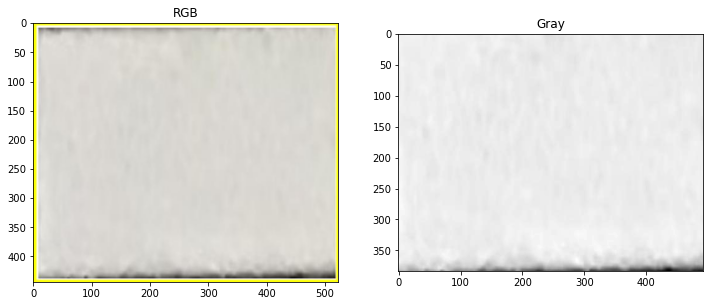

In [2]:
# =========================================Read Image==========================================

# Reading image BGR
img_BGR=cv2.imread('./cells/130.jpg', cv2.IMREAD_COLOR)

# Converting BGR color to RGB color format
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

#Removing Border
height=np.shape(img_RGB)[0]
width=np.shape(img_RGB)[1]
img_RGB_cropped=np.copy(img_RGB[10:height-10,0:width-10,:])

# Converting image to gary scale (0-255)
img_gray = cv2.cvtColor(img_RGB_cropped, cv2.COLOR_BGR2GRAY)
# print("max",np.max(img_gray))


# Show Images
show_images([img_RGB,img_gray],titles=['RGB','Gray'])


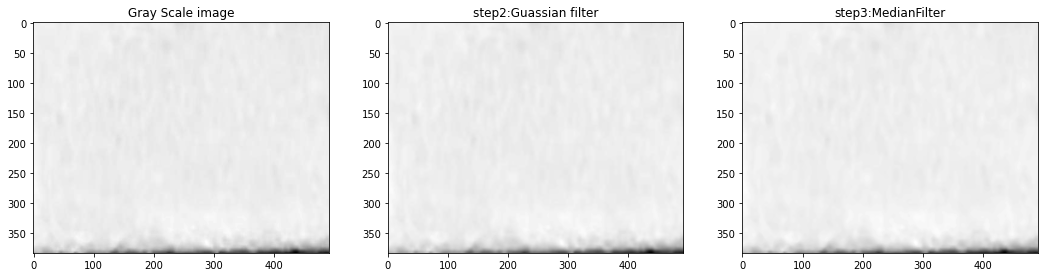

In [3]:
# =========================================PreProcessing==========================================

# Guassian Filter on the image to remove noise
# Gray Scale image,Kernel size(postive and odd),Sigma
Blurred_image_Guassian=cv2.GaussianBlur(img_gray,(5,5),1)

# Median Filter to remove Salt and Pepper
# non-linear Filtering technique => takes median of all pixels in the kernel and replaces the central element with this median value =>To reduce salt and pepper
# Image-Kernel size
Blurred_image_Median=cv2.medianBlur(img_gray, 5)

show_images([img_gray,Blurred_image_Guassian,Blurred_image_Median],titles=['Gray Scale image','step2:Guassian filter','step3:MedianFilter'])


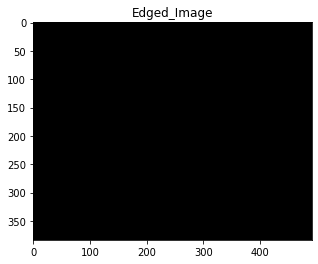

In [4]:
# =========================================Edge Detection==========================================
# Edge Dectrion using Canny (Optimal Edge Detector)
# Steps of Algorithm
#1.Guassian Smoothing:
#2.Sobel: to get first derivative in horizontal direction (Gx) and vertical direction (Gy) => the n it finds find edge gradient and direction for each pixel as follows:
# Edge_Gradient(G)=root(G2x+G2y),Angle(θ)=tan−1(Gy/Gx)
#3.Non Maxima Supression: to get rid of Double response of edges [Thin Edges] ie pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. 
#4.Hysteresis Thresholding:decides which are all edges are really edges and which are not Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity.
# Image(GrayScale),MinThreshold,MaxThreshold for hystresis Thresholding
Edged_Image=cv2.Canny(Blurred_image_Median,180,255)

#Aplly Closing (Dialtion - Errsoion) [Poor Results => we need more Dialation the Errosion]
# =>closing small holes inside the foreground objects, or small black points on the object.
# Closed_img = cv.morphologyEx(Edged_Image, cv.MORPH_CLOSE, (7,7))
# show_images([Edged_Image,Closed_img],titles=['Canny Edged Image(Disconnected Edges :( )','After Closing'])

# kernel = np.ones((5,5),np.uint8)
# Dilated_img = cv2.dilate(Edged_Image,kernel,iterations=2)
# Erroded_img = cv2.erode(Dilated_img,kernel,iterations=1)
# show_images([Dilated_img,Erroded_img],titles=['Dalated_img','Erroded_img'])
show_images([Edged_Image],titles=['Edged_Image'])


(0,)


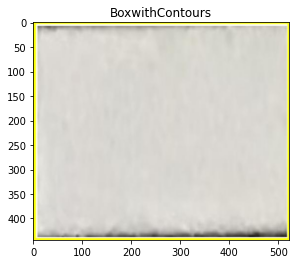

In [5]:
#Finding contours 
contoursBox, hierarchy = cv2.findContours(Edged_Image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(np.shape(contoursBox))

BoxwithContours=np.copy(img_RGB)
cv2.drawContours(BoxwithContours, np.copy(contoursBox), -1, (0,0,255), 5)
show_images([BoxwithContours],titles=['BoxwithContours'])

In [6]:
import imutils
if len(contoursBox) == 0:
    print("Empty")
else:
    print("BOX")

Empty
